Load Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Austin_Crash_Last_2_Years.csv'
data = pd.read_csv(file_path)

# Display basic information
# print(data.info())
# print(data.head())

<ipython-input-1-22866a137277>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
nr_cols = ["Crash ID", "case_id", "Primary address", "Secondary address", "Secondary address"]

In [ ]:
nr_cols.extend([col for col in data.columns if(col.startswith('rpt_street_sfx'))])
columns = data.columns
nr_cols.extend(columns[-6:])
data.drop(columns=nr_cols, inplace = True)
data.head()

,ID,crash_fatal_fl,rpt_block_num,rpt_street_name,crash_speed_limit,road_constr_zone_fl,latitude,longitude,crash_sev_id,sus_serious_injry_cnt,...,pedestrian_death_count,pedestrian_serious_injury_count,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,onsys_fl,private_dr_fl,micromobility_serious_injury_count,micromobility_death_count
0,190094,False,14400.0,THE LAKES,30.0,False,NaN,NaN,3,0,...,0,0,0,0,0,0,False,False,0,0
1,185842,False,4300.0,NOT REPORTED,55.0,False,NaN,NaN,3,0,...,0,0,0,0,0,0,True,False,0,0
2,191956,False,4600.0,N IH 35 NB,65.0,False,NaN,NaN,0,0,...,0,0,0,0,0,0,True,False,0,0
3,184630,False,7500.0,MOPAC,65.0,False,NaN,NaN,5,0,...,0,0,0,0,0,0,True,False,0,0
4,184501,False,12600.0,N US 183 HWY SB,65.0,False,30.432002,-97.765053,1,1,...,0,0,0,0,0,0,True,False,0,0


In [ ]:
data.columns

Index(['ID', 'crash_fatal_fl', 'rpt_block_num', 'rpt_street_name',
       'crash_speed_limit', 'road_constr_zone_fl', 'latitude', 'longitude',
       'crash_sev_id', 'sus_serious_injry_cnt', 'nonincap_injry_cnt',
       'poss_injry_cnt', 'non_injry_cnt', 'unkn_injry_cnt', 'tot_injry_cnt',
       'death_cnt', 'units_involved', 'point', 'motor_vehicle_death_count',
       'motor_vehicle_serious_injury_count', 'bicycle_death_count',
       'bicycle_serious_injury_count', 'pedestrian_death_count',
       'pedestrian_serious_injury_count', 'motorcycle_death_count',
       'motorcycle_serious_injury_count', 'other_death_count',
       'other_serious_injury_count', 'onsys_fl', 'private_dr_fl',
       'micromobility_serious_injury_count', 'micromobility_death_count'],
      dtype='object')

In [ ]:
def map_severity(sev):
  if(sev <= 0):
    return 0
  elif(sev <= 2):
    return 1
  elif(sev <= 4):
    return 2
  elif(sev <= 5):
    return 3


In [ ]:
#data["crash_sev_id"] = data["crash_sev_id"].apply(map_severity)

In [ ]:
data["crash_sev_id"].value_counts()

,count
crash_sev_id,
5,17064
3,7785
2,7406
0,2509
1,1152
4,271


In [ ]:
selected_features = [
    'crash_speed_limit', 'latitude', 'longitude', 'sus_serious_injry_cnt',
    'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'tot_injry_cnt',
    'crash_sev_id'
]

In [ ]:
data = data[selected_features]

In [ ]:
data.head()

,crash_speed_limit,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,tot_injry_cnt,crash_sev_id
0,30.0,NaN,NaN,0,0,1,0,1,3
1,55.0,NaN,NaN,0,0,1,0,1,3
2,65.0,NaN,NaN,0,0,0,2,0,0
3,65.0,NaN,NaN,0,0,0,2,0,5
4,65.0,30.432002,-97.765053,1,0,0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36187 entries, 0 to 36186
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crash_speed_limit      36186 non-null  float64
 1   latitude               35088 non-null  float64
 2   longitude              35088 non-null  float64
 3   sus_serious_injry_cnt  36187 non-null  int64  
 4   nonincap_injry_cnt     36187 non-null  int64  
 5   poss_injry_cnt         36187 non-null  int64  
 6   non_injry_cnt          36187 non-null  int64  
 7   tot_injry_cnt          36187 non-null  int64  
 8   crash_sev_id           36187 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.5 MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,crash_speed_limit,latitude,longitude,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,tot_injry_cnt,crash_sev_id
4,65.0,30.432002,-97.765053,1,0,0,0,1,1
5,65.0,30.217800,-97.839055,0,1,0,0,1,2
6,30.0,30.220475,-97.857792,0,0,0,5,0,5
7,35.0,30.463728,-97.801821,0,0,0,1,0,5
8,30.0,30.222205,-97.754992,0,0,0,2,0,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35087 entries, 4 to 36186
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crash_speed_limit      35087 non-null  float64
 1   latitude               35087 non-null  float64
 2   longitude              35087 non-null  float64
 3   sus_serious_injry_cnt  35087 non-null  int64  
 4   nonincap_injry_cnt     35087 non-null  int64  
 5   poss_injry_cnt         35087 non-null  int64  
 6   non_injry_cnt          35087 non-null  int64  
 7   tot_injry_cnt          35087 non-null  int64  
 8   crash_sev_id           35087 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.7 MB


In [ ]:
data['crash_sev_id'].value_counts()

,count
crash_sev_id,
5,16351
3,7524
2,7406
0,2384
1,1152
4,270


In [ ]:
data = data[data['crash_sev_id'] != 0]
data['crash_sev_id'].value_counts()

,count
crash_sev_id,
5,16351
3,7524
2,7406
1,1152
4,270


In [ ]:
data.columns

Index(['crash_speed_limit', 'latitude', 'longitude', 'sus_serious_injry_cnt',
       'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt',
       'tot_injry_cnt', 'crash_sev_id'],
      dtype='object')

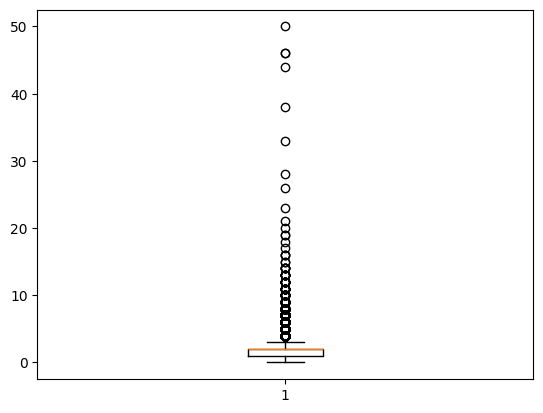

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data['non_injry_cnt'])
plt.show()

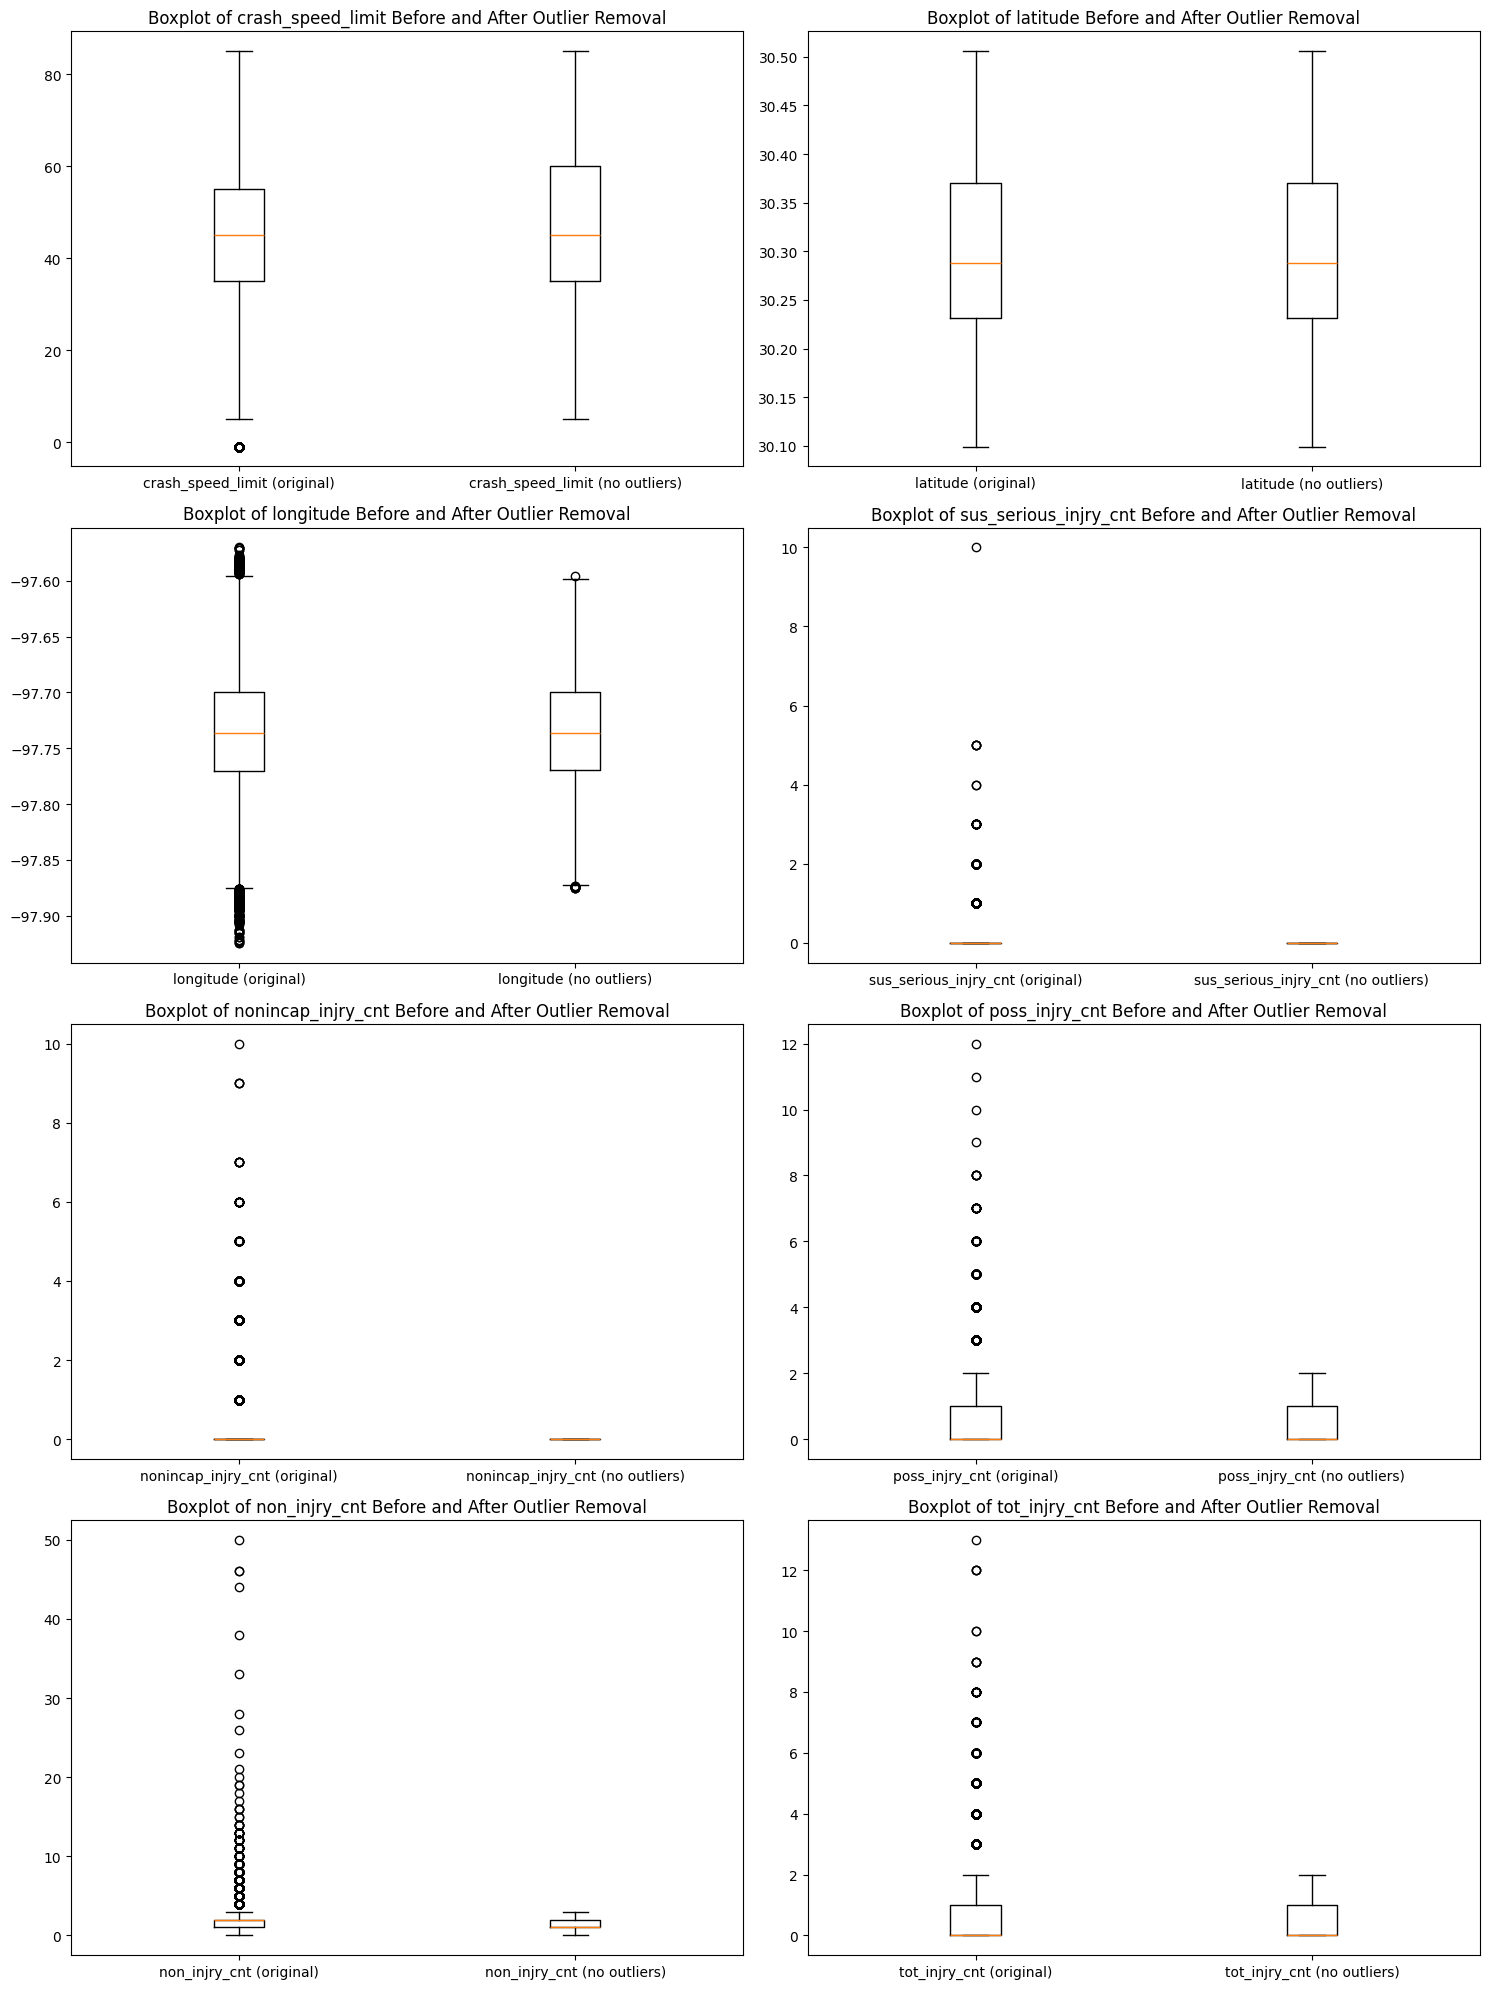

In [ ]:
import matplotlib.pyplot as plt

def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_filtered

# Select features for outlier removal and plotting
selected_features = ['crash_speed_limit', 'latitude', 'longitude', 'sus_serious_injry_cnt',
                    'nonincap_injry_cnt', 'poss_injry_cnt', 'non_injry_cnt', 'tot_injry_cnt']


# Create subplots for each selected feature
num_features = len(selected_features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, 5 * ((num_features + 1) // 2)))
axes = axes.flatten() # Flatten the axes array for easy iteration
for i, feature in enumerate(selected_features):
    # Remove outliers
    data_no_outliers = remove_outliers(data, feature)

    # Plot boxplots before and after outlier removal
    axes[i].boxplot([data[feature], data_no_outliers[feature]], labels=[f'{feature} (original)', f'{feature} (no outliers)'])
    axes[i].set_title(f'Boxplot of {feature} Before and After Outlier Removal')

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

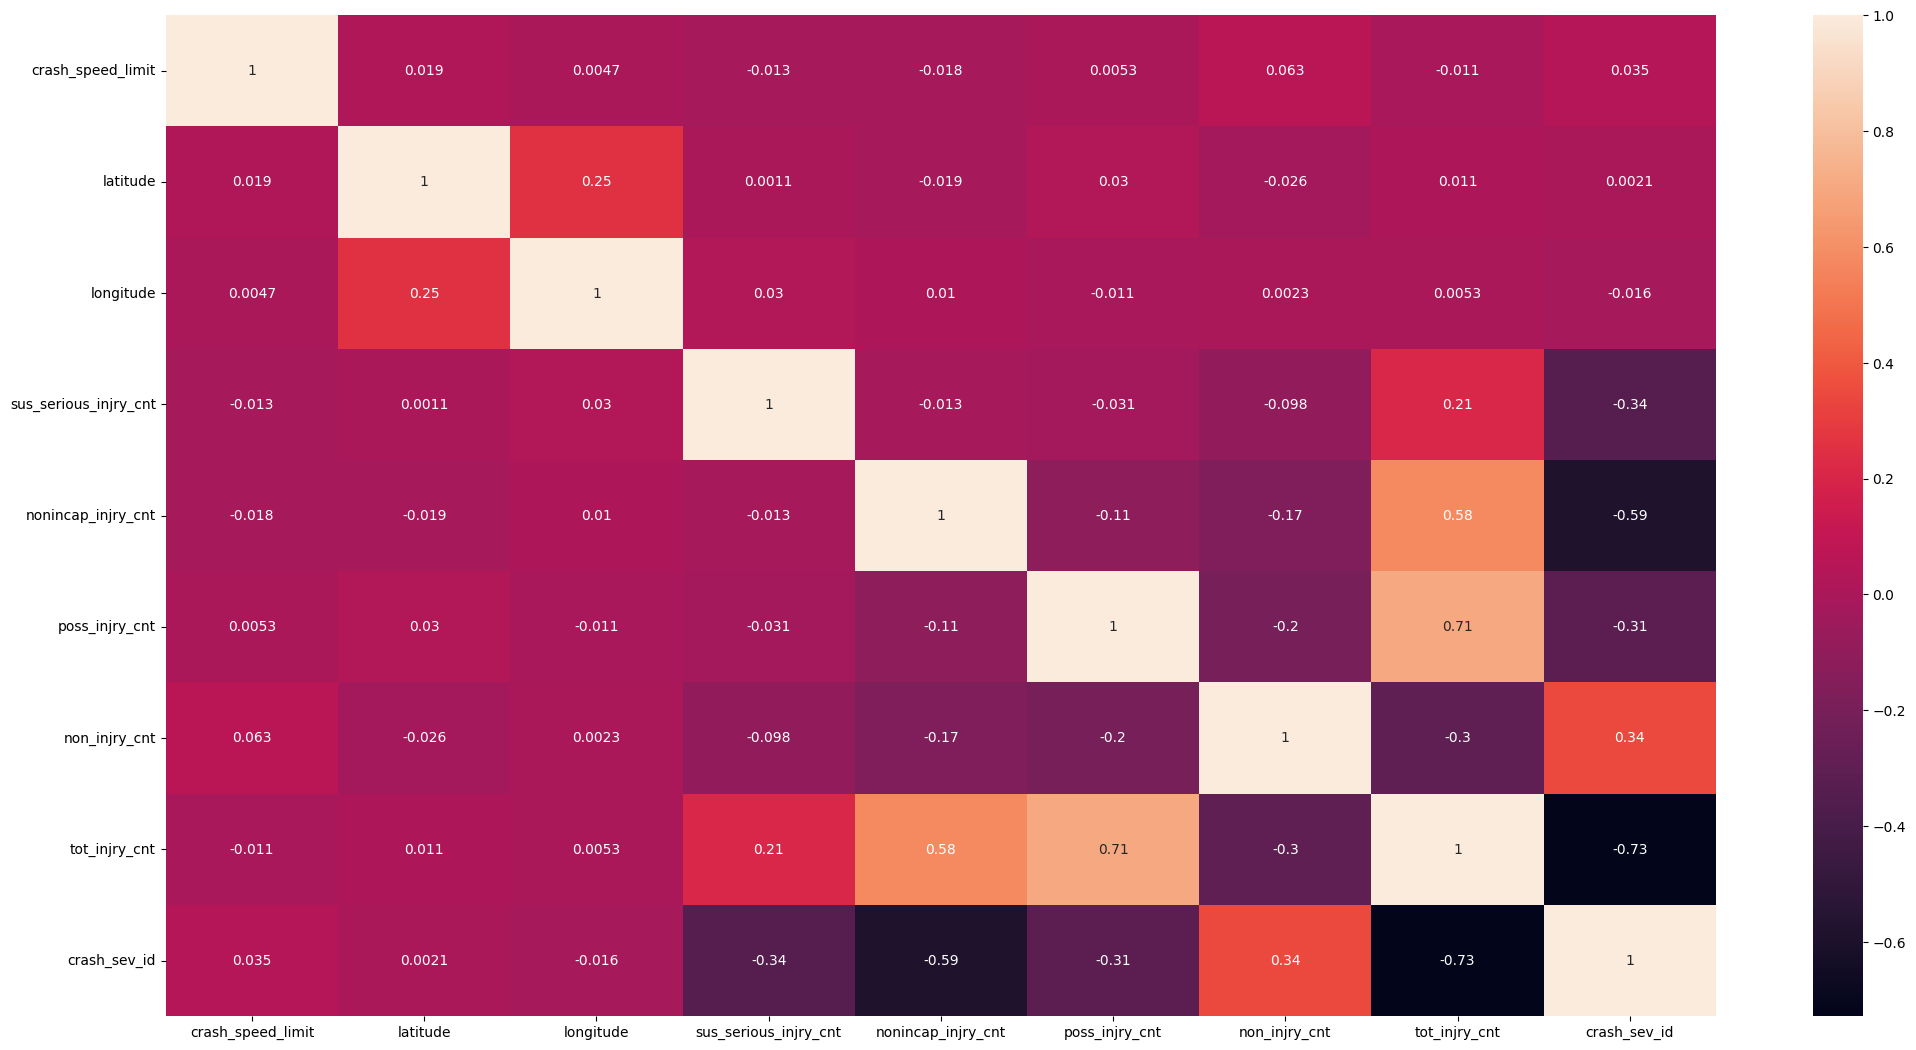

In [ ]:
plt.figure(figsize=(25,13))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cols = data.columns

In [ ]:
X, target = data[cols[:-1]], data[cols[-1]]

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataframe and 'target_column' is the target variable
X_scaled = data.drop('crash_sev_id', axis=1)  # Features
y = data['crash_sev_id']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({5: 12989, 3: 6051, 2: 5970, 1: 931, 4: 221})
After SMOTE: Counter({5: 12989, 2: 12989, 3: 12989, 1: 12989, 4: 12989})


In [ ]:
X_test, X_train_resampled, y_test, y_train_resampled = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

              precision    recall  f1-score   support

           1       0.98      0.84      0.91       931
           2       0.98      1.00      0.99      5970
           3       0.99      1.00      0.99      6051
           4       0.00      0.00      0.00       221
           5       0.99      1.00      0.99     12989

    accuracy                           0.99     26162
   macro avg       0.79      0.77      0.78     26162
weighted avg       0.98      0.99      0.98     26162

[[  782   112    34     0     3]
 [    0  5957    13     0     0]
 [    0     2  6049     0     0]
 [   12    27    18     0   164]
 [    0     0     0     0 12989]]
0.985283999694213


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=5)
rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       931
           2       1.00      1.00      1.00      5970
           3       1.00      1.00      1.00      6051
           4       1.00      0.28      0.43       221
           5       0.99      1.00      1.00     12989

    accuracy                           0.99     26162
   macro avg       0.99      0.86      0.88     26162
weighted avg       0.99      0.99      0.99     26162

[[  931     0     0     0     0]
 [    0  5970     0     0     0]
 [    0     0  6051     0     0]
 [   16    23    18    61   103]
 [    0     0     0     0 12989]]
0.9938842596131794


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=200, random_state=10, max_depth=10, min_samples_leaf=1, min_samples_split=5)
gb.fit(X_train_resampled, y_train_resampled)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       931
           2       1.00      1.00      1.00      5970
           3       1.00      1.00      1.00      6051
           4       0.71      0.28      0.40       221
           5       0.99      1.00      1.00     12989

    accuracy                           0.99     26162
   macro avg       0.94      0.85      0.88     26162
weighted avg       0.99      0.99      0.99     26162

[[  924     1     2     4     0]
 [    0  5966     0     4     0]
 [    0     0  6048     3     0]
 [   16    23    17    62   103]
 [    0     0     0    14 12975]]
0.9928522284229034


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.76      0.86       931
           2       0.97      0.97      0.97      5970
           3       0.96      0.99      0.98      6051
           4       1.00      0.07      0.13       221
           5       0.98      1.00      0.99     12989

    accuracy                           0.97     26162
   macro avg       0.98      0.76      0.78     26162
weighted avg       0.97      0.97      0.97     26162

[[  708   107    86     0    30]
 [    0  5798   117     0    55]
 [    0    20  5981     0    50]
 [   11    28    19    15   148]
 [    0    35    12     0 12942]]
0.9725556150141427


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


Training and Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

Best Parameters: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.9905970491552634
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       931
           2       0.99      1.00      1.00      5970
           3       1.00      1.00      1.00      6051
           4       0.00      0.00      0.00       221
           5       0.99      1.00      0.99     12989

    accuracy                           0.99     26162
   macro avg       0.79      0.80      0.79     26162
weighted avg       0.98      0.99      0.99     26162



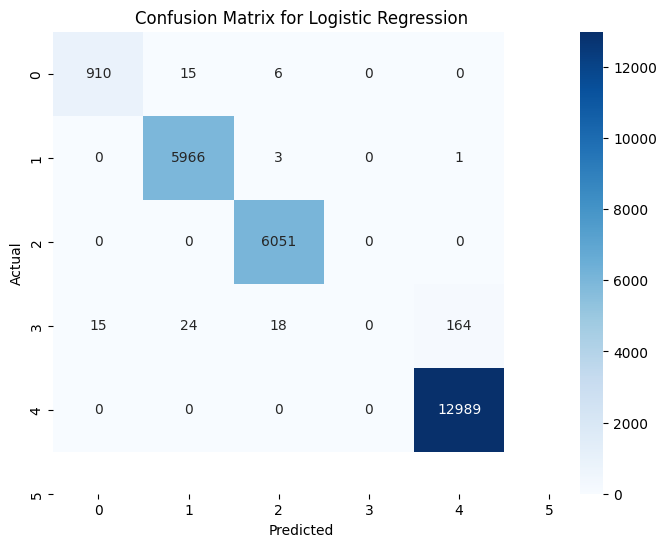

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training and Tuning Random Forest...
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9938078128583442
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       931
           2       1.00      1.00      1.00      5970
           3       1.00      1.00      1.00      6051
           4       0.97      0.28      0.43       221
           5       0.99      1.00      1.00     12989

    accuracy                           0.99     26162
   macro avg       0.99      0.85      0.88     26162
weighted avg       0.99      0.99      0.99     26162



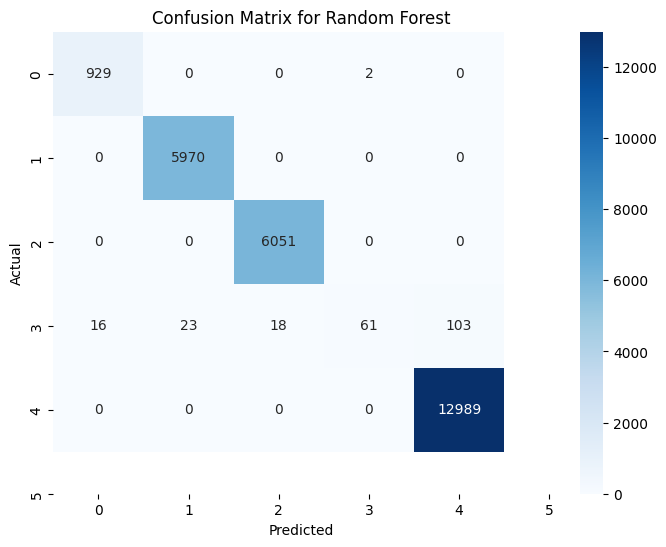


Training and Tuning Gradient Boosting...
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.9937695894809265
Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       931
           2       1.00      1.00      1.00      5970
           3       1.00      1.00      1.00      6051
           4       1.00      0.28      0.43       221
           5       0.99      1.00      1.00     12989

    accuracy                           0.99     26162
   macro avg       0.99      0.85      0.88     26162
weighted avg       0.99      0.99      0.99     26162



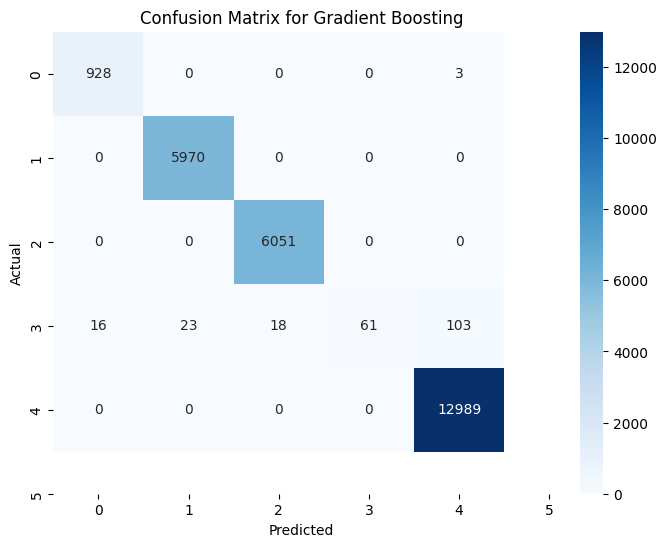


Training and Tuning k-Nearest Neighbors...
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9777539943429402
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.82      0.89       931
           2       0.98      0.98      0.98      5970
           3       0.97      0.99      0.98      6051
           4       0.38      0.19      0.25       221
           5       0.98      1.00      0.99     12989

    accuracy                           0.98     26162
   macro avg       0.86      0.80      0.82     26162
weighted avg       0.98      0.98      0.98     26162



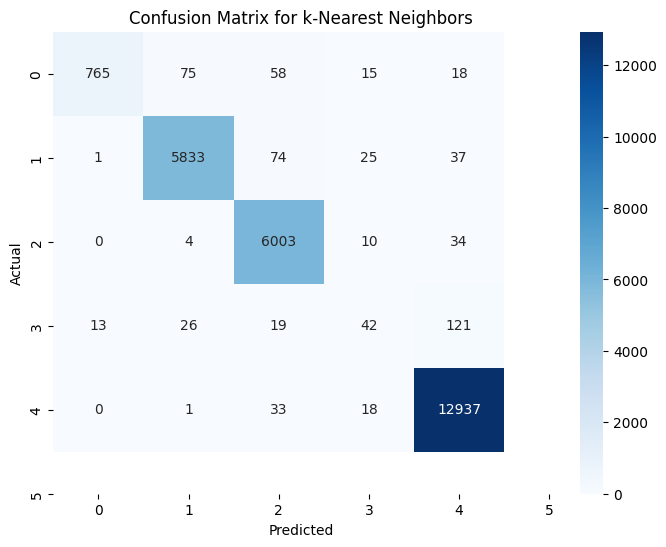

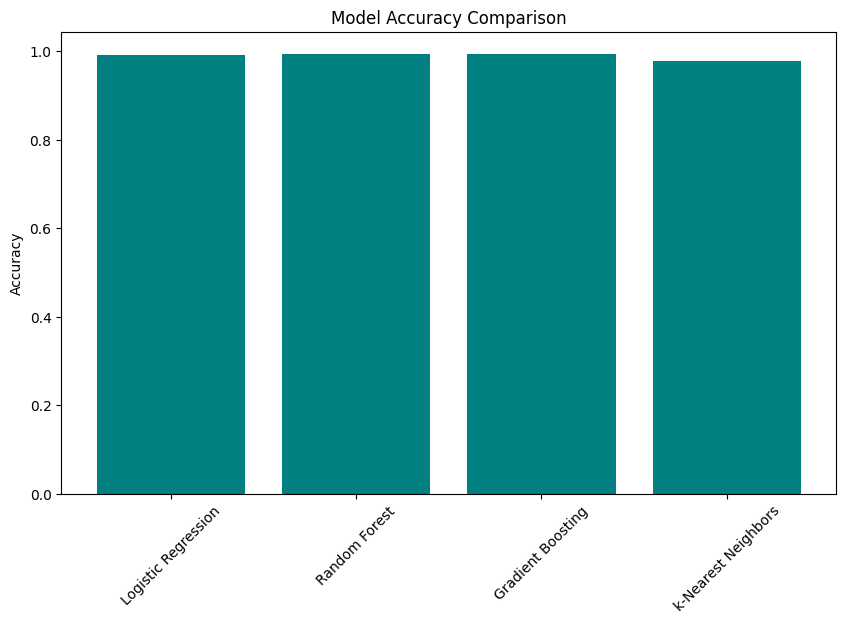

In [ ]:
## 3. Model Implementation, Hyperparameter Tuning, and Evaluation
# Define Models and Parameter Grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(multi_class='multinomial', max_iter=500, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'saga']

        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5]
        }
    },
    'k-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },

}

# Hyperparameter Tuning and Evaluation
results = {}
for model_name, model_info in models.items():
    print(f"\nTraining and Tuning {model_name}...")
    grid_search = GridSearchCV(
        model_info['model'], model_info['params'],
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test) if hasattr(best_model, 'predict_proba') else None

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC-AUC for Models Supporting Probabilities
    '''if y_proba is not None:
        y_test_bin = pd.get_dummies(y_test)
        plt.figure(figsize=(10, 8))
        for i in range(6):
            fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f'Severity {i}')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(f'ROC-AUC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()'''

    # Store Results
    results[model_name] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'best_params': grid_search.best_params_
    }

# Compare Model Performance
accuracy_scores = {model: metrics['accuracy'] for model, metrics in results.items()}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='teal')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

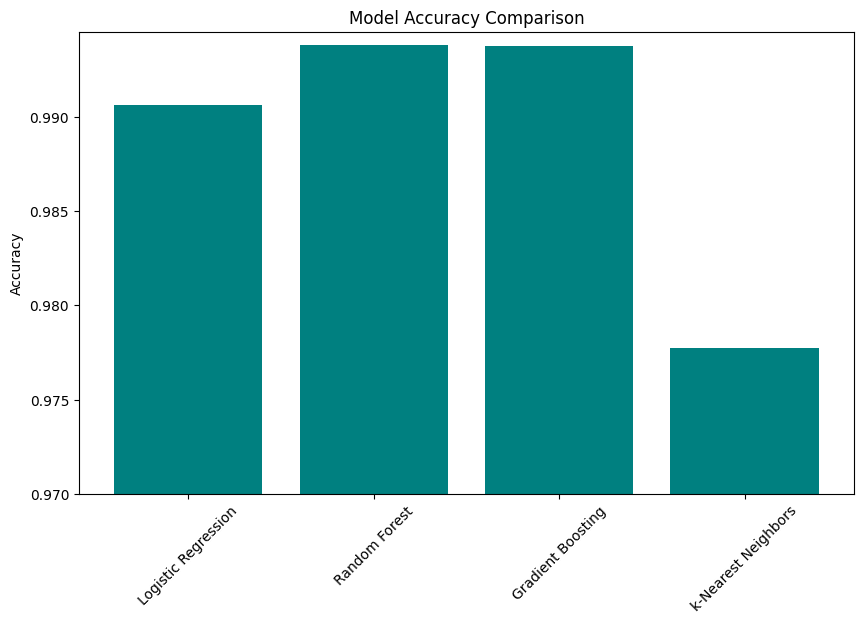

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(results):
  accuracy_scores = {model: metrics['accuracy'] for model, metrics in results.items()}
  plt.figure(figsize=(10, 6))
  plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='teal')
  plt.title('Model Accuracy Comparison')
  plt.ylabel('Accuracy')
  plt.ylim(0.97, 0.9945)  # Set y-axis limits for zoomed-in view
  plt.xticks(rotation=45)
  plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.3f}".format(x))) # format y axis to 3 decimals
  plt.show()
plot_model_performance(results)

In [ ]:
# Create a sample of 10 data points from the test set
sample_indices = np.random.choice(X_test.index, size=20, replace=False)
sample_data = X_test.loc[sample_indices]

# Predict the severity for the sample data
sample_predictions = rf.predict(sample_data)

# Display the sample data and predictions
for i in range(20):
    print(f"Sample {i+1}:")
    print("Data:", sample_data.iloc[i].to_dict())
    print("Predicted Severity:", sample_predictions[i])
    print("-" * 20)

Sample 1:
Data: {'crash_speed_limit': 65.0, 'latitude': 30.19801496, 'longitude': -97.68412779, 'sus_serious_injry_cnt': 0.0, 'nonincap_injry_cnt': 0.0, 'poss_injry_cnt': 1.0, 'non_injry_cnt': 1.0, 'tot_injry_cnt': 1.0}
Predicted Severity: 3
--------------------
Sample 2:
Data: {'crash_speed_limit': 50.0, 'latitude': 30.40678287, 'longitude': -97.67486514, 'sus_serious_injry_cnt': 0.0, 'nonincap_injry_cnt': 0.0, 'poss_injry_cnt': 0.0, 'non_injry_cnt': 5.0, 'tot_injry_cnt': 0.0}
Predicted Severity: 5
--------------------
Sample 3:
Data: {'crash_speed_limit': 15.0, 'latitude': 30.1834348, 'longitude': -97.83363244, 'sus_serious_injry_cnt': 0.0, 'nonincap_injry_cnt': 0.0, 'poss_injry_cnt': 0.0, 'non_injry_cnt': 1.0, 'tot_injry_cnt': 0.0}
Predicted Severity: 5
--------------------
Sample 4:
Data: {'crash_speed_limit': 55.0, 'latitude': 30.3929557, 'longitude': -97.84174783, 'sus_serious_injry_cnt': 0.0, 'nonincap_injry_cnt': 0.0, 'poss_injry_cnt': 0.0, 'non_injry_cnt': 3.0, 'tot_injry_cnt'

In [ ]:
# Install necessary libraries
!pip install geopy
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="accident_locator")

# Get location details for each sample
for i in range(20):
    latitude = sample_data.iloc[i]['latitude']
    longitude = sample_data.iloc[i]['longitude']
    location = geolocator.reverse(f"{latitude}, {longitude}")
    if location:
        print(f"Location details for sample {i+1}:")
        print(location.address)
        print(location.raw)
    else:
        print(f"Could not find location details for sample {i+1}.")
    print("-" * 20)

# Install folium for map visualization
!pip install folium
import folium

# Create a map centered on the average latitude and longitude of your data
avg_latitude = data['latitude'].mean()
avg_longitude = data['longitude'].mean()
accident_map = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=10)


# Add markers for each sample accident
for i in range(20):
    latitude = sample_data.iloc[i]['latitude']
    longitude = sample_data.iloc[i]['longitude']
    severity = sample_predictions[i]

    folium.Marker(
        location=[latitude, longitude],
        popup=f"Predicted Severity: {severity}",
        icon=folium.Icon(color='lightgreen' if severity == 1 else 'green' if severity == 2
                         else 'orange' if severity == 3 else 'gray' if severity == 4
                         else 'red if severity == 5') # Customize marker color based on severity
    ).add_to(accident_map)

# Display the map
accident_map

Location details for sample 1:
US Highway 183 South, Austin, Travis County, Texas, 78714, United States
{'place_id': 292379965, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 436628505, 'lat': '30.1980008833546', 'lon': '-97.6840383308185', 'class': 'highway', 'type': 'trunk', 'place_rank': 26, 'importance': 0.05340827725642783, 'addresstype': 'road', 'name': 'US Highway 183 South', 'display_name': 'US Highway 183 South, Austin, Travis County, Texas, 78714, United States', 'address': {'road': 'US Highway 183 South', 'city': 'Austin', 'county': 'Travis County', 'state': 'Texas', 'ISO3166-2-lvl4': 'US-TX', 'postcode': '78714', 'country': 'United States', 'country_code': 'us'}, 'boundingbox': ['30.1975022', '30.1982341', '-97.6841168', '-97.6840016']}
--------------------
Location details for sample 2:
Purple Heart Trail, Park Central, Austin, Travis County, Texas, 78753, United States
{'place_id': 291851137, 'licence': 'Da

<ipython-input-36-bf01a9d5d2b0>:40: UserWarning: color argument of Icon should be one of: {'purple', 'lightred', 'beige', 'pink', 'darkred', 'gray', 'darkpurple', 'red', 'orange', 'green', 'lightblue', 'darkblue', 'lightgray', 'white', 'black', 'cadetblue', 'lightgreen', 'blue', 'darkgreen'}.
  icon=folium.Icon(color='lightgreen' if severity == 1 else 'green' if severity == 2
